# **What is Optical Character Recognition(OCR)**?
--Optical Character Recognition (OCR) is a technology that empowers computers to recognize and interpret text from images, whether scanned documents, photos, or handwritten notes. It has emerged as a vital component in various fields, from document digitization to aiding visually impaired individuals. The primary goal of OCR is to convert visual representations of characters into editable and searchable data, making it an invaluable tool in our increasingly digitized society. As we delve into the capabilities of OCR, we’ll showcase a practical implementation using TensorFlow, a popular open-source machine learning framework.

# installing Tensorflow

In [1]:
!pip install tensorflow

### Started.......

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!unzip /content/OCR_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data2/training_data/R/50083.png  
  inflating: data2/training_data/R/50119.png  
  inflating: data2/training_data/R/50155.png  
  inflating: data2/training_data/R/50191.png  
  inflating: data2/training_data/R/50227.png  
  inflating: data2/training_data/R/50263.png  
  inflating: data2/training_data/R/50299.png  
  inflating: data2/training_data/R/50335.png  
  inflating: data2/training_data/R/50371.png  
  inflating: data2/training_data/R/50407.png  
  inflating: data2/training_data/R/50443.png  
  inflating: data2/training_data/R/50479.png  
  inflating: data2/training_data/R/50515.png  
  inflating: data2/training_data/R/50551.png  
  inflating: data2/training_data/R/50587.png  
  inflating: data2/training_data/R/50623.png  
  inflating: data2/training_data/R/50659.png  
  inflating: data2/training_data/R/50695.png  
  inflating: data2/training_data/R/50731.png  
  inflating: data2/training_data/R/50767.png  
  inflati

In [12]:
images = []
labels = []

path = '/content/data/training_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

In [13]:
X = np.array(images)
y = np.array(labels)


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# **Shuffling the data:**
The shuffle function is used to shuffle the order of samples and their corresponding labels.

X_sh contains the shuffled images.

y_sh contains the corresponding shuffled labels.

The random_state=42 argument ensures reproducibility by initializing the random number generator with a specific seed.

This is done to introduce randomness in the data which is useful while training.

In [15]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)


# **Building the Model**
The model is implemented using the Keras API with a TensorFlow backend.

The model architecture consists of the following layers:

Convolutional layer with 16 filters, a 3×3 kernel, and ReLU activation.
Max pooling layer to reduce spatial dimensions.
Convolutional layer with 32 filters and ReLU activation.
Max pooling layer.
Convolutional layer with 64 filters and ReLU activation.
Max pooling layer.
Convolutional layer with 128 filters and ReLU activation.
Max pooling layer.
Flatten layer to prepare for fully connected layers.
Dense (fully connected) layer with 128 neurons and ReLU activation.
Dense layer with 64 neurons and ReLU activation.
Dense output layer with 36 neurons and softmax activation for multiclass classification.

In [16]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))


# Model compiling and training
Compiling the Model:
optimizer=’adam’: Adam optimization algorithm is chosen for adaptive learning rates.
loss=’sparse_categorical_crossentropy’: Loss function for multi-class classification with integer labels.

metrics=[‘accuracy’]: Monitoring accuracy during training.
Training the Model:
model.fit(X_sh, y_sh, validation_split=0.2, batch_size=16, epochs=10)
X_sh and y_sh are shuffled and preprocessed images and labels.
validation_split=0.2: 20% of the training data used for validation.
batch_size=16: Number of samples in each training iteration.
epochs=10: Number of passes through the entire training dataset.


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)


Epoch 1/10
1032/1032 [==============================] - 69s 66ms/step - loss: 0.8066 - accuracy: 0.7782 - val_loss: 0.2406 - val_accuracy: 0.9348
Epoch 2/10
1032/1032 [==============================] - 66s 64ms/step - loss: 0.2083 - accuracy: 0.9363 - val_loss: 0.1708 - val_accuracy: 0.9474
Epoch 3/10
1032/1032 [==============================] - 62s 60ms/step - loss: 0.1383 - accuracy: 0.9536 - val_loss: 0.1458 - val_accuracy: 0.9595
Epoch 4/10
1032/1032 [==============================] - 62s 60ms/step - loss: 0.1151 - accuracy: 0.9611 - val_loss: 0.1772 - val_accuracy: 0.9460
Epoch 5/10
1032/1032 [==============================] - 60s 59ms/step - loss: 0.0932 - accuracy: 0.9651 - val_loss: 0.1564 - val_accuracy: 0.9547
Epoch 6/10
1032/1032 [==============================] - 61s 59ms/step - loss: 0.0814 - accuracy: 0.9709 - val_loss: 0.1529 - val_accuracy: 0.9564
Epoch 7/10
1032/1032 [==============================] - 62s 60ms/step - loss: 0.0754 - accuracy: 0.9739 - val_loss: 0.1671 -

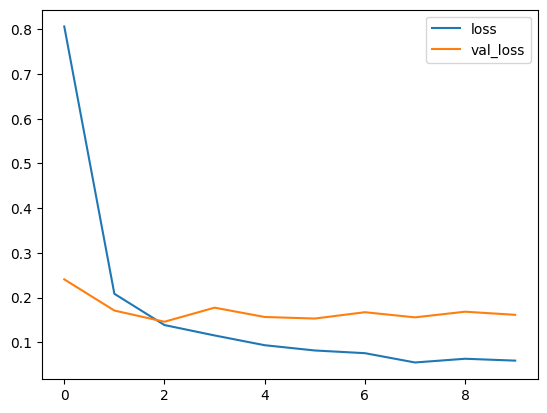

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])


# **Model Testing**
We do similar preprocessing steps taken for the training dataset.

In [21]:
test_images = []
test_labels = []

path = '/content/data/testing_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [22]:
X_test = np.array(test_images)
y_test = np.array(test_labels)

# **Making predictions**
preds = model.predict(X_test): Using the trained model to make predictions on the test dataset (X_test).

np.argmax(preds, axis=1): Obtaining the index of the class with the highest predicted probability for each sample.

le.inverse_transform(…): Inverse transforming the predicted indices back to the original class labels using the LabelEncoder (le).

In [23]:
preds = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))


32/32 [==============================] - 2s 42ms/step


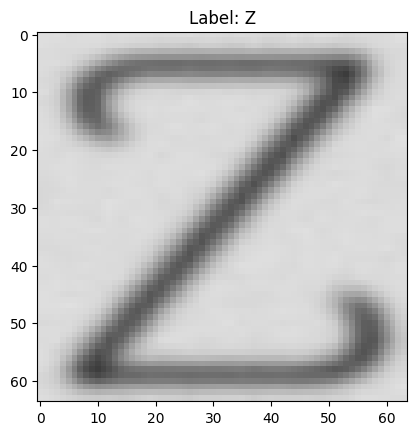

In [24]:
plt.imshow(X_test[197])
plt.title(f"Label: {predicted_labels[197]}")
plt.show()

# Model Evaluation
**Label Encoding for Test Data:**
y_test = le.fit_transform(y_test):
Applying label encoding to the true labels (y_test) of the test dataset using the same LabelEncoder (le) used during training.

**Evaluating the Model on Test Data: **
test_loss, test_accuracy = model.evaluate(X_test, y_test): Evaluating the trained model on the test dataset.
X_test: Test images.
y_test: True labels for the test dataset.
test_loss: The loss computed on the test dataset.
test_accuracy: The accuracy of the model on the test dataset.
Printing Test Accuracy:
print(f”Test Accuracy: {test_accuracy}”): Displays the test accuracy achieved by the model on the test dataset.

In [25]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 [==============================] - 2s 46ms/step - loss: 0.0325 - accuracy: 0.9871
Test Accuracy: 0.9871031641960144
